<a href="https://colab.research.google.com/github/BlackSparrow-43/deep-rl-class/blob/main/My_Projects/Q-Learning/FrozenLake-1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym[all]

import numpy as np
import gym
import random
import time
from tqdm.notebook import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyvirtualdisplay
!apt install xvfb -y

import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from IPython import display

%matplotlib inline
Display().start()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:
def show_render_1(env):
  plt.figure(3,figsize=(27,9))
  plt.imshow(env.render(mode='rgb_array'))
  display.display(plt.gcf())
  display.clear_output(wait=True)

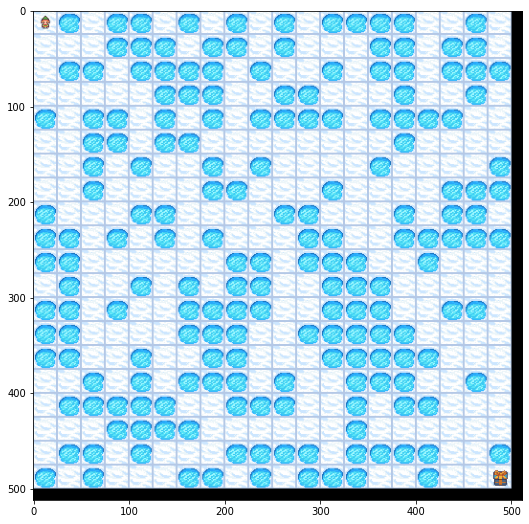

In [ ]:
from gym.envs.toy_text.frozen_lake import generate_random_map

map_size = 20
random_map = generate_random_map(size=map_size, p=.5)
#random_map=["SFFF", "FHFH", "FFFH", "HFFG"]

env = gym.make("FrozenLake-v1", map_name="8x8",desc=random_map, is_slippery=False)
env.reset()
show_render_1(env)

In [ ]:
from gym.envs.registration import register

register(
    id="FrozenLake-v1",
    entry_point = "gym.envs.toy_text:FrozenLakeEnv",
    kwargs = {"map_name":random_map,
              "is_slippery":False},
    max_episode_steps = 1000,
    
)

/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment FrozenLake-v1
  logger.warn(f"Overriding environment {spec.id}")


In [ ]:
state_space = env.observation_space.n
action_space = env.action_space.n
q_table = np.zeros((state_space,action_space))

(state_space,action_space)

(400, 4)

In [ ]:
epsilon = 1.
max_epsilon = 1.
min_epsilon = .01
decay_rate = .0005

total_episodes = 30000
each_episode_steps = 1000
learning_rate = 0.8
discount_rate = 0.95
log_interval = 1000

In [ ]:
def epsilon_greedy_policy(epsilon,state,q_table):
  if random.uniform(0,1) > epsilon:
    action = np.argmax(q_table[state])
    select="table"
  else:
    action = env.action_space.sample()
    select = "random"
  return action, select

In [ ]:
def epsilon_reduce(epsiode):
  return min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epsiode)

In [ ]:
def greedy_policy(state,q_table):
  return np.max(q_table[state])

In [ ]:
def new_reward(reward, state, done):
  goal = (map_size**2)-1
  if done:
    if state == goal:
      reward = 1000
    else:
      reward = -500
  else:
    reward = -2
  return reward

In [ ]:
def train():
  table_nos, random_nos, total_rewards, episode_reward = 0, 0, 0, 0
  for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    step_reward = 0
    epsilon = epsilon_reduce(episode)
    for step in range(each_episode_steps):
      action, select = epsilon_greedy_policy(epsilon, state, q_table)
      new_state, reward, done, info = env.step(action)
      rewards = new_reward(reward, new_state, done)
      error = learning_rate*(rewards + discount_rate*(greedy_policy(new_state, q_table)) - q_table[state][action])
      q_table[state][action] = q_table[state][action] + error
      step_reward += rewards
      if done:
        break
      state = new_state
      if select == "table":
        table_nos += 1
      elif select == "random":
        random_nos += 1
    episode_reward += step_reward
    if episode % log_interval == 0:
      table_per = round((table_nos/(table_nos+random_nos))*100,2)
      random_per = round((random_nos/(table_nos+random_nos))*100,2)
      total_rewards += episode_reward
      print("Gen="+str(episode),"random="+str(random_per),"table="+str(table_per),"steps_taken="+str(step),"mean_reward="+str(episode_reward/1000),"episode_reward="+str(episode_reward),"total_reward="+str(total_rewards)) 
      episode_reward = 0
  env.close()
  print("Gen="+str(episode),"random="+str(random_per),"table="+str(table_per),"steps_taken="+str(step),"mean_reward="+str(episode_reward/1000),"episode_reward="+str(episode_reward),"total_reward="+str(total_rewards)) 
  return q_table

In [ ]:
def play(q_table):
  state = env.reset()
  done = False
  rewards =0
  for step in range(each_episode_steps):
    time.sleep(1)
    show_render_1(env)
    action = np.argmax(q_table[state])
    new_state, reward, done, info = env.step(action)
    rewards += new_reward(reward, new_state, done)
    state = new_state
    if done:
      break
  show_render_1(env)
  print("#############steps_taken="+str(step),"reward="+str(rewards)+"###############")
  env.close()

In [ ]:
#q_table = np.load("frozenlake.npy")

FileNotFoundError: ignored

In [ ]:
q_table_frozenlake = train()

ZeroDivisionError: ignored

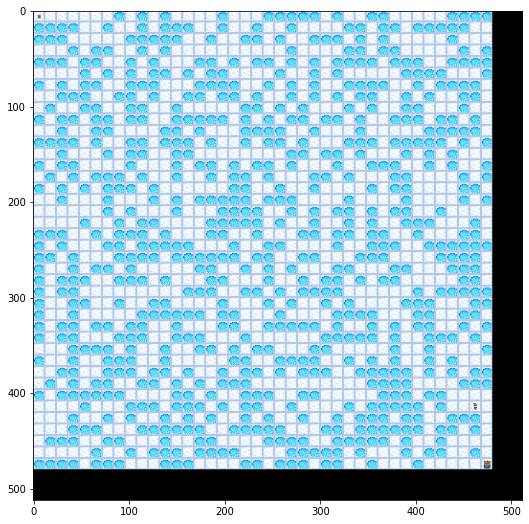

In [ ]:
play(q_table_frozenlake)

In [ ]:
#np.save("frozenlake.npy",q_table)

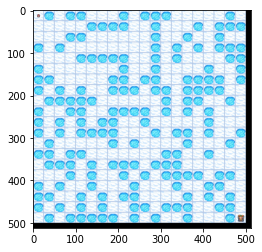

In [ ]:
img = plt.imshow(env.render('rgb_array'))
def show_render_2(env):
  img.set_data(env.render('rgb_array')) 
  display.display(plt.gcf())
  display.clear_output(wait=True)

In [ ]:
!apt-get install python-opengl -y
!pip install piglet